In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('/Users/vinhe/Code/Courses/Data Science Bootcamp/22-Deep Learning/DATA/fake_reg.csv')
#C:\Users\vinhe\Code\Courses\Data Science Bootcamp\22-Deep Learning

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


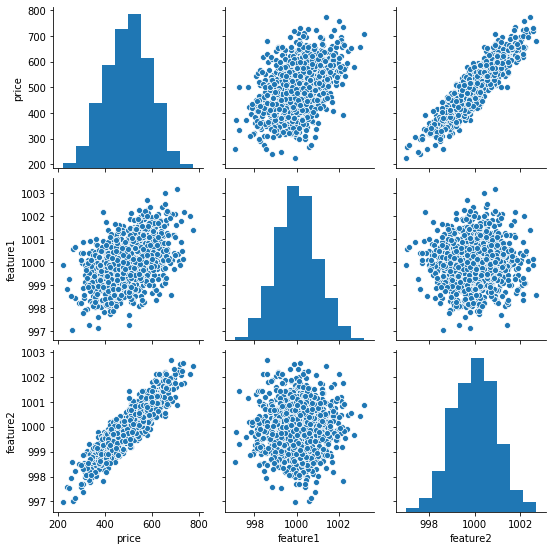

In [4]:
# we will treat this as a regression problem, where based off feature 1 and 2 we will attempt to predict the price
# since we have historical information this will be a supervised learning problem
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values
# TF requires numpy arrays which is why we need to add ".values"
# we use capital X because typically a feature matrix is 2 dimensional and this is indicated by the capital

In [7]:
y = df['price'].values
# y is the value we are trying to predict, and this is lowercase as it is a 1 dimensional vector

In [8]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [9]:
# time for train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape

(700, 2)

In [11]:
X_test.shape

(300, 2)

In [12]:
# next step is to normalise the data because we're working with weights and biases inside of a neural networks
# if we have very large datasets in our feature set that can cause errors with weights later
from sklearn.preprocessing import MinMaxScaler
# this is a simple way to normalise data, based on the standard deviation and min and max values

In [13]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [14]:
scaler = MinMaxScaler()

In [15]:
# now need to fit the scalar onto the training data, i.e. fit on X_train
# it simply calculates the parameters it needs to perform the actual scaling later on.
scaler.fit(X_train)
# we only perform scaling on the training data to prevent data leaking from the test set, so not to cheat and look into test set

MinMaxScaler(copy=True, feature_range=(0, 1))

In [16]:
# now to actually perform the scalar transformation of the training data
X_train = scaler.transform(X_train)

In [17]:
X_test = scaler.transform(X_test)

In [18]:
X_train.min()
# just a check to see if the scaling worked

0.0

In [19]:
X_train.max()

1.0

# Creating and training the neural network

In [20]:
#import tensorflow as tf

In [22]:
#print(tf.__version__)

2.2.0


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# to build a simple model with keras we will set a base sequential layer and then add a simple dense layer

In [25]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`).
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every sub-tensor

In [30]:
# there are two ways of creating a keras based model
# one way is to call sequential and then pass a list of the layer you want

#model = Sequential([Dense(4,activation='relu'),
                   #Dense(2,activation='relu'),
                   #Dense(1)])

# a dense layer means that it is a regular denseley-connected neural network layer, and it is normal feed forward network where every neuron is connected to every other neuron in the next layer
# arguments include units (another word for neurons, how many neurons are going to be in this layer) and activation (takes in a string call for what activation function these neurons should be using)
# relu = rectifier linear unit activation function

In [31]:
# second method (and preferred) is to create an empy sequential model and then off that model variable you add layers in separately over time.
# can quickly turn off a layer by commenting out a cell, which is harder to do with a list
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1)) # so outputs a single value

model.compile(optimizer='rmsprop',loss='mse')
# compile the model

In [32]:
model.fit(x=X_train,y=y_train,epochs=250)
# parameters we need: x, y, epochs (how many passes through entire dataset)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256669.2188
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256568.2344
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256462.6250
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256341.8906
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256204.1094
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 256046.8594
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255868.4062
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255665.8438
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255438.6250
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255185.2500
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 254903.6094
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 954us/step - loss: 2644.9158
Epoch 97/250
22/22 [==============================] - 0s 1ms/step - loss: 2242.7747
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 2132.2078
Epoch 99/250
22/22 [==============================] - 0s 999us/step - loss: 2097.3074
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 2063.3069
Epoch 101/250
22/22 [==============================] - 0s 972us/step - loss: 2035.9209
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 2006.9376
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 1978.9298
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 1950.9552
Epoch 105/250
22/22 [==============================] - 0s 1ms/step - loss: 1921.2593
Epoch 106/250
22/22 [==============================] - 0s 2ms/step - loss: 1891.8391
Epoch 107/250
22/22 [==============================] - 0s 1ms/step - loss: 1

22/22 [==============================] - 0s 1ms/step - loss: 118.4243
Epoch 193/250
22/22 [==============================] - 0s 1ms/step - loss: 111.2054
Epoch 194/250
22/22 [==============================] - 0s 1ms/step - loss: 103.6488
Epoch 195/250
22/22 [==============================] - 0s 1000us/step - loss: 98.4052
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 91.8174
Epoch 197/250
22/22 [==============================] - 0s 1ms/step - loss: 85.7306
Epoch 198/250
22/22 [==============================] - 0s 974us/step - loss: 79.2179
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 74.1052
Epoch 200/250
22/22 [==============================] - 0s 954us/step - loss: 68.2233
Epoch 201/250
22/22 [==============================] - 0s 1ms/step - loss: 64.6089
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 59.6880
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 55.5346
Epoch 20

In [33]:
# can plot this error rate
model.history.history

{'loss': [256669.21875,
  256568.234375,
  256462.625,
  256341.890625,
  256204.109375,
  256046.859375,
  255868.40625,
  255665.84375,
  255438.625,
  255185.25,
  254903.609375,
  254592.640625,
  254248.65625,
  253870.5625,
  253457.03125,
  253002.3125,
  252506.375,
  251968.796875,
  251384.59375,
  250751.953125,
  250066.015625,
  249326.359375,
  248530.8125,
  247679.8125,
  246763.984375,
  245784.6875,
  244734.109375,
  243620.203125,
  242434.40625,
  241171.640625,
  239832.796875,
  238411.265625,
  236910.28125,
  235324.9375,
  233641.09375,
  231865.46875,
  230012.6875,
  228059.359375,
  225996.78125,
  223840.640625,
  221586.90625,
  219222.8125,
  216759.109375,
  214170.828125,
  211480.28125,
  208681.484375,
  205769.1875,
  202753.1875,
  199616.921875,
  196362.828125,
  192977.640625,
  189490.5,
  185896.25,
  182160.421875,
  178322.96875,
  174364.578125,
  170302.0625,
  166120.953125,
  161845.59375,
  157459.25,
  152951.9375,
  148338.4375,
  143

In [34]:
# can turn this loss dictionary into a dataframe
loss_df = pd.DataFrame(model.history.history)

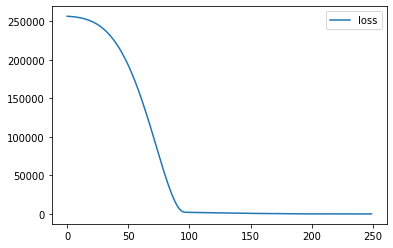

In [35]:
loss_df.plot()

# Model Evaluation

In [36]:
# there are many ways to evaluate how the model will perform on data it has never seen before
# one method is model.evaluate

model.evaluate(X_test,y_test,verbose=0)
# this figure represents the metrics loss that we decided on,in this case mean squared error

24.962688446044922

In [37]:
model.evaluate(X_train,y_train,verbose=0)
# can compare this to our training set

23.933931350708008

In [38]:
test_predictions = model.predict(X_test)

In [39]:
test_predictions
# here is a list of the prices predicted based off our test set

array([[405.24484],
       [623.35095],
       [591.9376 ],
       [572.1314 ],
       [366.712  ],
       [579.0371 ],
       [515.0472 ],
       [458.9823 ],
       [549.1635 ],
       [447.39304],
       [611.60223],
       [548.69244],
       [419.05472],
       [408.84946],
       [650.91547],
       [437.20108],
       [508.2446 ],
       [659.8173 ],
       [662.41144],
       [565.3415 ],
       [334.28867],
       [444.77017],
       [382.5402 ],
       [378.7226 ],
       [566.4524 ],
       [610.47253],
       [532.2795 ],
       [427.7899 ],
       [655.3028 ],
       [413.98605],
       [442.5227 ],
       [485.0303 ],
       [438.33932],
       [681.67377],
       [424.62546],
       [417.68192],
       [501.6965 ],
       [550.32587],
       [509.70862],
       [395.4282 ],
       [618.38104],
       [416.54282],
       [604.25275],
       [445.8073 ],
       [501.88303],
       [581.43024],
       [668.69073],
       [490.2576 ],
       [318.5394 ],
       [485.34094],


In [40]:
# to compare these predictions against the y_test in a dataframe
test_predictions = pd.Series(test_predictions.reshape(300,))

In [41]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [42]:
pred_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [43]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [44]:
pred_df

,Test True Y,0
0,402.296319,405.244843
1,624.156198,623.350952
2,582.455066,591.937622
3,578.588606,572.131409
4,371.224104,366.712006
...,...,...
295,525.704657,528.969849
296,502.909473,515.401672
297,612.727910,609.459167
298,417.569725,416.848480


In [45]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [46]:
pred_df

,Test True Y,Model Predictions
0,402.296319,405.244843
1,624.156198,623.350952
2,582.455066,591.937622
3,578.588606,572.131409
4,371.224104,366.712006
...,...,...
295,525.704657,528.969849
296,502.909473,515.401672
297,612.727910,609.459167
298,417.569725,416.848480


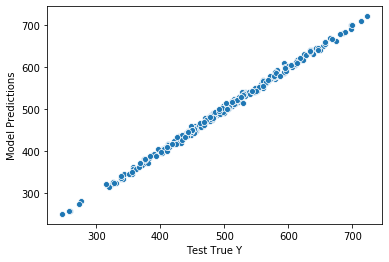

In [47]:
# can plot these in a scatterplot
sns.scatterplot(x='Test True Y',y='Model Predictions',data=pred_df)

# can see we are close to a straight fitting line, so model is performing well

In [48]:
# to compare quantatively
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [52]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
# this means that on average the model is $4 off the true price point
# how can we tell if this is good or bad?

4.003183855909647

In [53]:
df.describe()
# can see that the average price is roughly $500, min of $224 and max of $774, so $4 is less than 1% of the mean price

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [54]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

24.962693260052966

In [55]:
# for root mean squared value
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])**0.5

4.996267933173017

# Evaluating on brand new data

In [56]:
new_gem = [[998,1000]] # just a random example with made up features

In [57]:
new_gem = scaler.transform(new_gem)

In [58]:
model.predict(new_gem)
# so the way you evaluate your test set is basically the same thing you would do for brand new data

array([[419.73898]], dtype=float32)

In [60]:
# to be able to save the model via keras
from tensorflow.keras.models import load_model

In [61]:
model.save('my_gem_model.h5')

In [62]:
later_model = load_model('my_gem_model.h5')

In [63]:
later_model.predict(new_gem)

array([[419.73898]], dtype=float32)